In [101]:
import pandas as pd
df = pd.read_csv('Admission_Predict.csv')

In [102]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [103]:
df.drop(columns=['Serial No.'], inplace=True)

In [104]:
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [105]:
df.shape

(400, 8)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [107]:
df.duplicated().sum()

0

In [108]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
X_train.shape, X_test.shape

((320, 7), (80, 7))

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [112]:
X_train_scaler

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [113]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [114]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
# model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [117]:
history = model.fit(X_train_scaler, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 1s 46ms/step - loss: 1.4553 - val_loss: 1.4919
Epoch 2/150
8/8 [==============================] - 0s 24ms/step - loss: 1.2814 - val_loss: 1.3089
Epoch 3/150
8/8 [==============================] - 0s 19ms/step - loss: 1.1190 - val_loss: 1.1328
Epoch 4/150
8/8 [==============================] - 0s 19ms/step - loss: 0.9618 - val_loss: 0.9681
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.8187 - val_loss: 0.8102
Epoch 6/150
8/8 [==============================] - 0s 19ms/step - loss: 0.6792 - val_loss: 0.6609
Epoch 7/150
8/8 [==============================] - 0s 19ms/step - loss: 0.5482 - val_loss: 0.5226
Epoch 8/150
8/8 [==============================] - 0s 16ms/step - loss: 0.4267 - val_loss: 0.3979
Epoch 9/150
8/8 [==============================] - 0s 20ms/step - loss: 0.3143 - val_loss: 0.2938
Epoch 10/150
8/8 [==============================] - 0s 18ms/step - loss: 0.2256 - val_loss: 0.2062
Epoch 11/150
8/8 [=

In [118]:
y_pred = model.predict(X_test_scaler)

3/3 [==============================] - 0s 4ms/step


In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7551161011716476

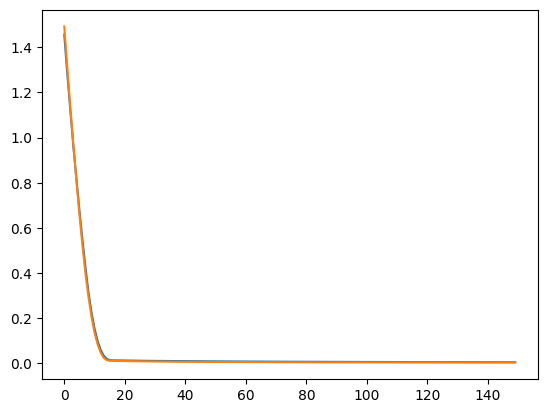

In [120]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])